<a href="https://colab.research.google.com/github/joaovictoramaralgoncalves/Projetos_de_aprendizado/blob/master/Modulo_2_Basic_Visualization_Tools_Continued.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modulo 2 - Basic Visualization Tools Continued

OBSERVAÇÕES GERAIS
' Para abrir R no Google Colab basta usar o código: https://colab.research.google.com/#create=true&language=r

Caso queira ver a apostila desse módulo no curso da IBM tem o link: https://labs.cognitiveclass.ai/v2/tools/jupyterlab?ulid=ulid-8110c9866fad704e8c306cbc78a09aca90d1a2a5 '

In [5]:
## Bibliotecas ##
#################
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Gráfico de Dispersão Básico

'mtcars <- o conjunto de dados integrado, que rastreia 11 variáveis para automóveis de 1973 a 1974. <br></br>
mpg <- significa milhas por galão; e <br></br>
wt <- significa peso.
Cada ponto na saída representa as milhas por galão e o peso de um automóvel.'


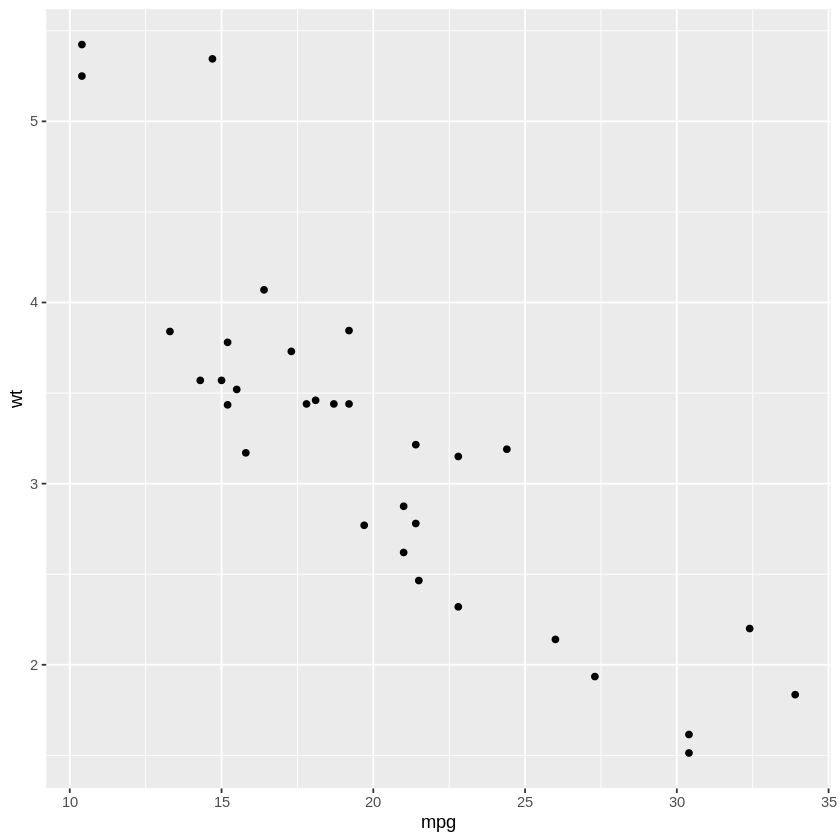

In [7]:
qplot(mpg,wt, data=mtcars)

## mudando a forma dos pontos
Em 'shape = 1', pode colocar qualquer número maior que 0.<br>
*shepe =19 é o mesmo formato que se não colocar a função:
'geom_point(shape = 19)'

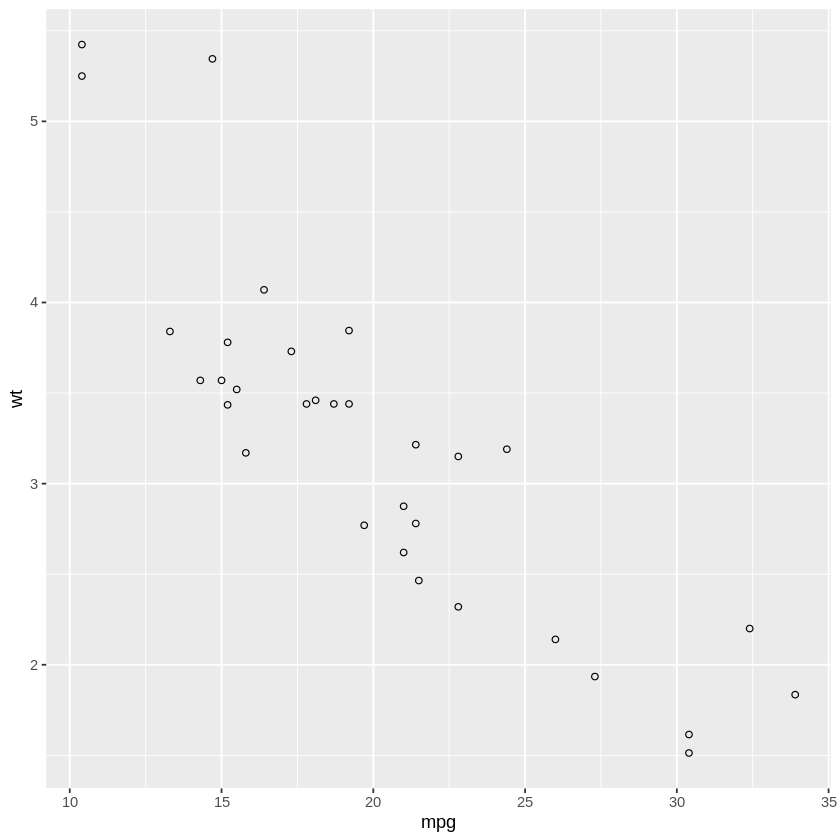

In [9]:
ggplot(mtcars, aes(x = mpg, y = wt)) + 
  geom_point(shape = 1)

## três variáveis em um shape
Além de milhas por galão e peso adicionei o número de cilindros.

[1] "agora podemos ver como fica essa dispersão de três variáveis."

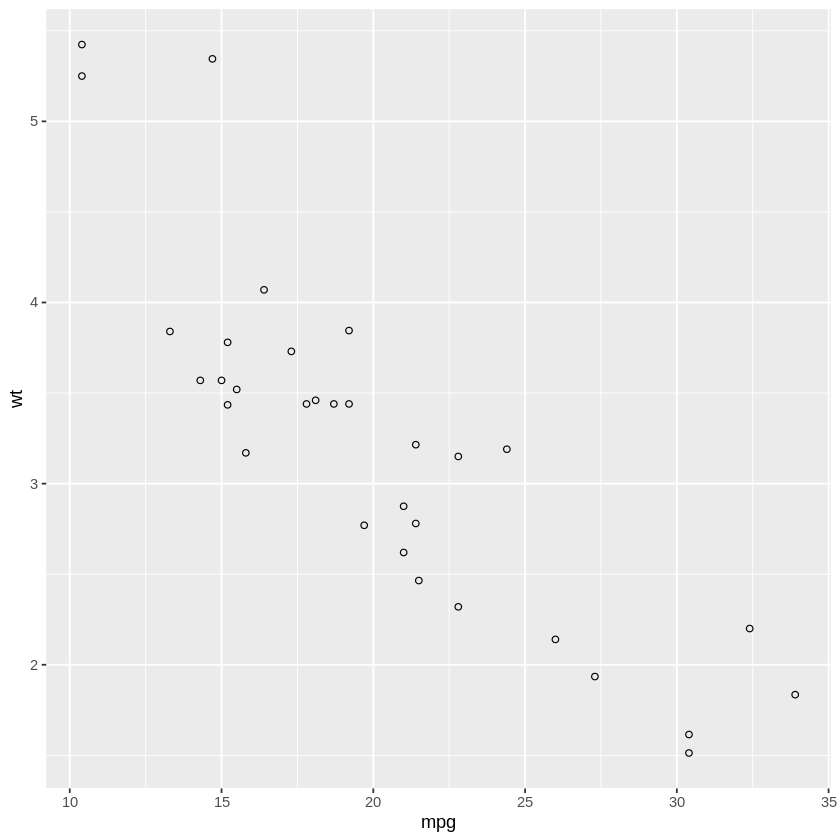

In [11]:
mtcars$cylFactor <- factor(mtcars$cyl)

'agora podemos ver como fica essa dispersão de três variáveis.'
ggplot(mtcars, aes(x=mpg, y=wt, shape=cylFactor)) +
  geom_point(shape = 1)

## mudando a cor dos dados no gráfico


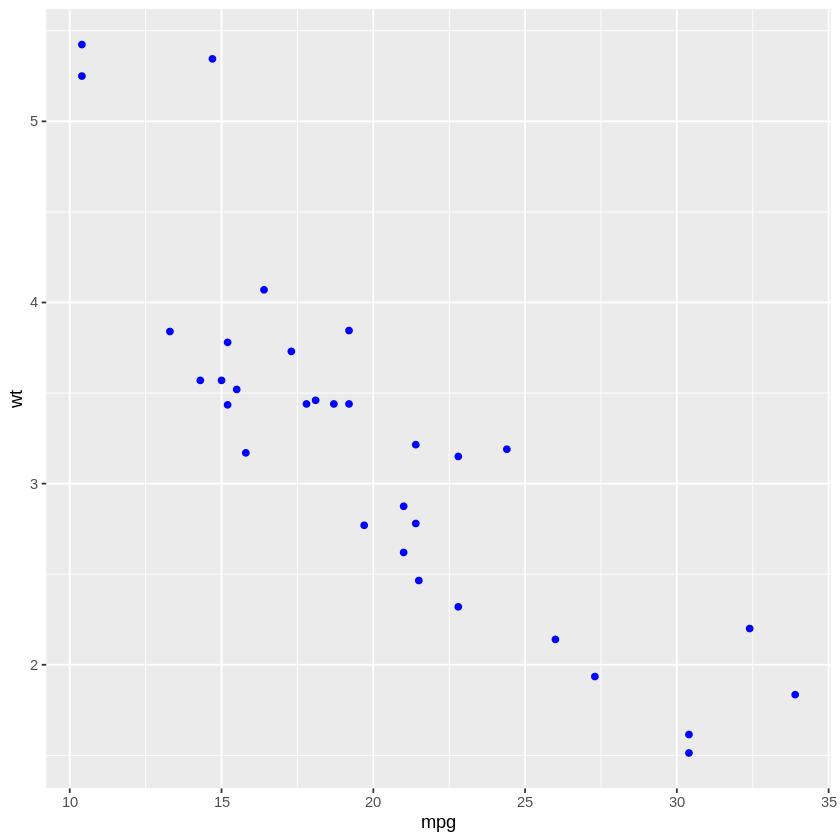

In [12]:
ggplot(mtcars, aes(x=mpg,y=wt)) +
  geom_point(shape = 19, colour="blue")

## cor por numeração
Assim podemos ver como os dados se dispersão em relação a cor de cada um

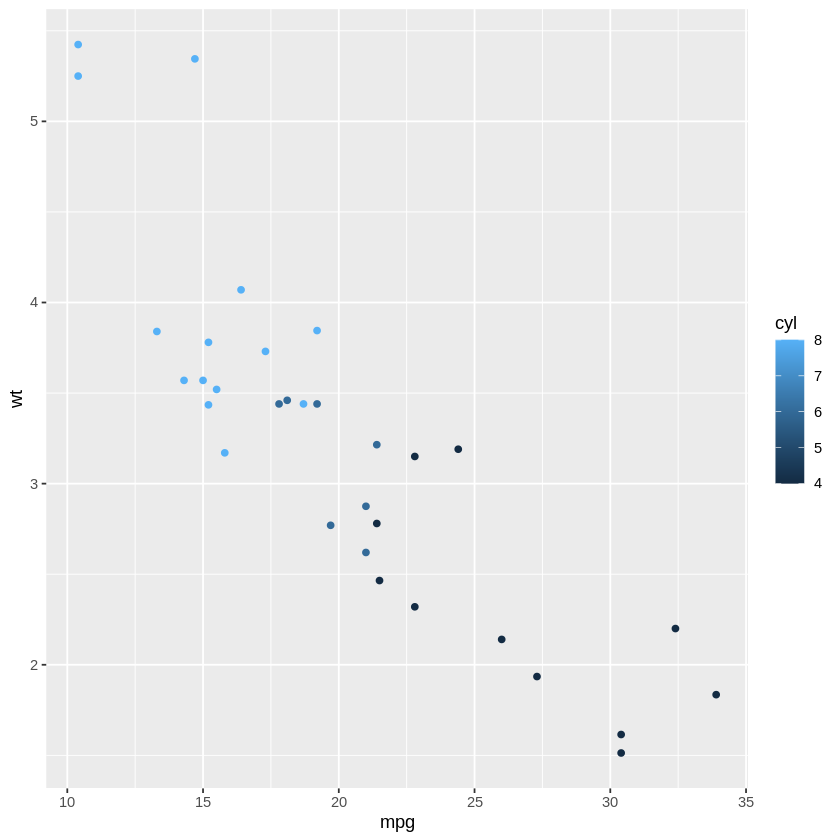

In [13]:
ggplot(mtcars, aes(x=mpg, y=wt, color = cyl)) +
  geom_point(shape = 19)

## Cor por categoria usando a variável mtcars$cylFactor que criamos mais cedo
Podemos entender melhor o que está acontecendo com cada variável.

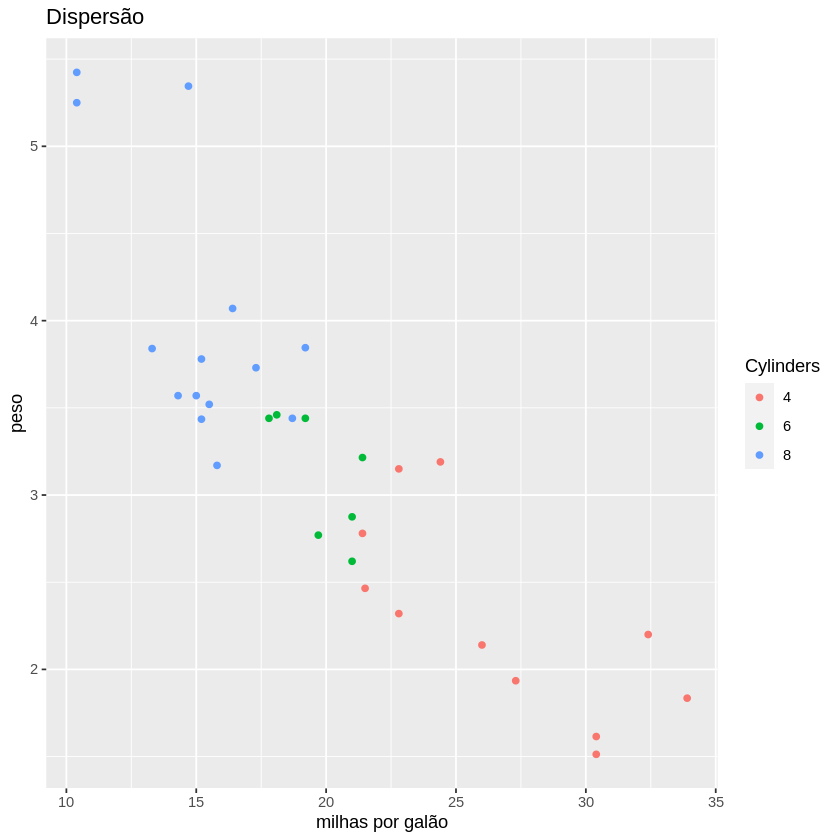

In [14]:
ggplot(mtcars, aes(x=mpg,y=wt,color=cylFactor)) +
  geom_point(shape=19)+
  xlab("milhas por galão") +    #eixo x nome
  ylab("peso") +    # eixo y nome
  labs(colour = "Cylinders") +    #mudando o nome da legenda
  ggtitle("Dispersão")    #mudando o nome do título